## 1. Explorando os dados


Esta pesquisa utiliza dados sobre pagamentos de clientes de Taiwan fazendo uma análise sobre a inadimplência.




In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


Agora, você pode descobrir os seguintes fatos sobre o conjunto de dados?

- Número total de consumidores
- Número de onsumidores que efetuaram o pagamento
- Número de consumidores que não efetuaram o pagamento
- Taxa de pagantes (%)


In [2]:
# Read student data
credit_data = pd.read_csv("UCI_Credit_Card.csv")
print( "successo!")
# Note: The last column 'passed' is the target/label, all other are feature columns

successo!


In [3]:
# Dataset Carregado, limitando as 10 primeira linhas
credit_data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,next_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [4]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_consumers = credit_data.shape[0]
n_features = credit_data.shape[1]-1
n_paying = credit_data.next_payment[credit_data.next_payment == 1].count()
n_failed = credit_data.next_payment[credit_data.next_payment == 0].count()
grad_rate = (float(n_paying) / n_consumers) * 100.0
print ("Total de clientes: {}".format(n_consumers))
print ("Número de clients que pagaram: {}".format(n_paying))
print ("Número de clientes que não pagaram: {}".format(n_failed))
print ("Número de colunas de características: {}".format(n_features))
print ("Taxa de pagamento: {:.2f}%".format(grad_rate))

Total de clientes: 30000
Número de clients que pagaram: 6636
Número de clientes que não pagaram: 23364
Número de colunas de características: 24
Taxa de pagamento: 22.12%


## 2. Preparando os dados
Nesta seção, prepararemos os dados para modelagem, treinamento e teste.

### Identificar colunas de características e de destino

Separado os dados em colunas de características e de destino e ver se se esses dados não são numéricos. <br/>
** Nota **: Para este conjunto de dados, a última coluna (`'next_payment'`) é o destino que estamos tentando prever.

In [5]:
feature_cols = list (credit_data.columns [1:-1])
target_col = credit_data.columns [-1] #  rótulo de destino
print ("coluna (s) de recursos: - \n {}". format (feature_cols))
print ("\ncoluna de destino: {}". format (target_col))

X_all = credit_data [feature_cols] # feactures-caracteristicas
y_all = credit_data [target_col] # next_payment
print ("\n Características: -")
print (X_all.head ()) # imprime as primeiras 5 linhas
print (y_all.head ()) 

coluna (s) de recursos: - 
 ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

coluna de destino: next_payment

 Características: -
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455  

## 3. Pré-processamento dos dados

 OneHotEncoder, não é necessario pois todos os dados são numéricos

In [6]:
# Colunas de recurso de pré-processamento
#def preprocess_features(X):
#    outX = pd.DataFrame(index=X.index) 
#    #Verifique cada coluna
#    for col, col_data in X.iteritems():
#        if col_data.dtype == object:
#            col_data = pd.get_dummies(col_data, prefix=col)  

#        outX = outX.join(col_data) 
#    return outX

#X_all = preprocess_features(X_all)
print ("Colunas processadas ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))
X_all.head(3)

Colunas processadas (23):-
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


### Dividir os dados em conjuntos de treinamento e teste

In [7]:
# Primeiro, decida quantas amostras de treinamento e teste você deseja
#from sklearn.cross_validation import train_test_split
num_all = credit_data.shape[0]  
from sklearn.model_selection import train_test_split
num_train = 20000  
num_test = num_all - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=20000)
print ("Conjunto de treinamento: {} ".format(X_train.shape[0]))
print ("Conjunto de teste: {} ".format(X_test.shape[0]))

Conjunto de treinamento: 20000 
Conjunto de teste: 10000 


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 4. Treinando e avaliando modelos
Escolhi os seguintes modelos, para essa avaliação supervisionada:
 - Logistic Regression
 - Decision Tree
 - SVC
 - GaussianNB
 - Perceptron

In [8]:
# Treinando o modelo
import time

def train_classifier(clf, X_train, y_train):
    print ("Treinando {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Tempo de treino (secs): {:.3f}".format(end - start))
    return end - start

clf = DecisionTreeClassifier()

# Ajustar o modelo aos dados de treinamento
train_classifier(clf, X_train, y_train)  

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 0.967


0.9668741226196289

In [42]:
# Prever e calcular a pontuação F1
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print ("Prevendo rótulos usando {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Tempo de previsão (secs): {:.3f}".format(end - start))

    return f1_score(target.values, y_pred, pos_label=1, average='micro'), end - start

train_f1_score = predict_labels(clf, X_train, y_train)
print (" F1score para o conjunto de treinamento: {}".format(train_f1_score[0]))


Prevendo rótulos usando GridSearchCV...
Tempo de previsão (secs): 0.001
 F1score para o conjunto de treinamento: 0.8056666666666665


In [43]:
# Prever nos dados de teste
print ("F1score para o conjunto de teste: {}".format(predict_labels(clf, X_test, y_test)[0]))

Prevendo rótulos usando GridSearchCV...
Tempo de previsão (secs): 0.004
F1score para o conjunto de teste: 0.8016666666666666


### Processando vários modelos

In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
#classifiers = [DecisionTreeClassifier(), Perceptron()]
classifiers = [DecisionTreeClassifier(), SVC(), GaussianNB(), LogisticRegression(), Perceptron()]
results = { 
        'Classificador': [],
        'Tamanho': [], 
        'Tempo treino': [], 
        'Tempo predisão': [], 
        'F1 score - treino': [], 
        'F1 score - teste': []
    }
datasets = [train_test_split(X_all, y_all, train_size=x, test_size=2500) for x in [5000, 10000, 20000]]
for clf in classifiers:
    for data in datasets:
        X_train, X_test, y_train, y_test = data
        time_train = train_classifier(clf, X_train, y_train)
        f1_train, time_predict = predict_labels(clf, X_train, y_train)
        f1_test, time_predict = predict_labels(clf, X_test,y_test)
        
        results['Classificador'].append(clf.__class__.__name__)
        results['Tamanho'].append(X_train.shape[0])
        results['Tempo treino'].append("{:.3f}".format(time_train))
        results['Tempo predisão'].append("{:.3f}".format(time_predict))
        results['F1 score - treino'].append(f1_train)
        results['F1 score - teste'].append(f1_test)
        
pd.DataFrame(results)

Treinando DecisionTreeClassifier...
Tempo de treino (secs): 0.213
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.003
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.003
Treinando DecisionTreeClassifier...
Tempo de treino (secs): 0.403
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.007
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.001
Treinando DecisionTreeClassifier...
Tempo de treino (secs): 0.974
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.011
Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.001
Treinando SVC...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Tempo de treino (secs): 5.197
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 4.289
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 2.114
Treinando SVC...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Tempo de treino (secs): 36.748
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 16.420
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 4.066
Treinando SVC...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Tempo de treino (secs): 262.170
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 62.822
Prevendo rótulos usando SVC...
Tempo de previsão (secs): 7.895
Treinando GaussianNB...
Tempo de treino (secs): 0.007
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.005
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.004
Treinando GaussianNB...
Tempo de treino (secs): 0.014
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.012
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.000
Treinando GaussianNB...
Tempo de treino (secs): 0.022
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.021
Prevendo rótulos usando GaussianNB...
Tempo de previsão (secs): 0.002
Treinando LogisticRegression...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tempo de treino (secs): 0.249
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.001
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.001
Treinando LogisticRegression...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tempo de treino (secs): 0.516
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.000
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.004
Treinando LogisticRegression...


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tempo de treino (secs): 1.475
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.005
Prevendo rótulos usando LogisticRegression...
Tempo de previsão (secs): 0.000
Treinando Perceptron...
Tempo de treino (secs): 0.014
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.001
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.002
Treinando Perceptron...
Tempo de treino (secs): 0.021
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.004
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.000
Treinando Perceptron...
Tempo de treino (secs): 0.040
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.004
Prevendo rótulos usando Perceptron...
Tempo de previsão (secs): 0.004


C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0

,Classificador,Tamanho,Tempo treino,Tempo predisão,F1 score - treino,F1 score - teste
0,DecisionTreeClassifier,5000,0.213,0.003,1.00000,0.7228
1,DecisionTreeClassifier,10000,0.403,0.001,0.99980,0.7076
2,DecisionTreeClassifier,20000,0.974,0.001,0.99940,0.7132
3,SVC,5000,5.197,2.114,0.99500,0.7700
4,SVC,10000,36.748,4.066,0.99600,0.7812
5,SVC,20000,262.170,7.895,0.99325,0.7656
6,GaussianNB,5000,0.007,0.004,0.38460,0.3800
7,GaussianNB,10000,0.014,0.000,0.36920,0.3712
8,GaussianNB,20000,0.022,0.002,0.36355,0.3704
9,LogisticRegression,5000,0.249,0.001,0.78100,0.7688


## 5. Redução de dimensionalidade

In [38]:
pca = PCA(n_components=15) # , whiten=True
pca.fit(X_train)
X_train_ = pca.transform(X_train)
X_test_ = pca.transform(X_test)
#X_train_[0], y_train[0]

#clff = SVC()
clff = DecisionTreeClassifier()
clff.fit(X_train_, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[ 61.05  90.11  93.24  95.27  96.34  97.26  98.04  98.64  99.18  99.46
  99.71  99.88 100.02 100.02 100.02]


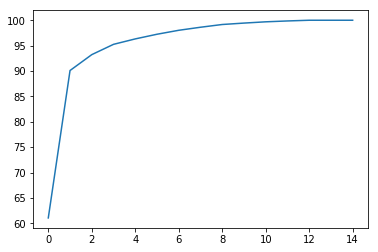

In [39]:
pca.components_ 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [40]:
train_f1_score2 = predict_labels(clff, X_train_, y_train)
print (" F1score para o conjunto de treinamento: {}".format(train_f1_score2[0]))

Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.005
 F1score para o conjunto de treinamento: 0.9995333333333334


In [41]:
# Prever nos dados de teste
print ("F1score para o conjunto de teste: {}".format(predict_labels(clff, X_test_, y_test)[0]))

Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.004
F1score para o conjunto de teste: 0.7044


## 6. Refinando o modelo e mostrando a melhor pontuação de F1

A pontuação final de f1 do meu modelo é 0,8102 para o Decision Tree

Para chegar a essa pontuação, a pesquisa de grade mostrou que definir uma profundidade máxima de 2 nós e o máximo de recursos usando a raiz quadrada de recursos produz o melhor resultado de modelo f1.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
def performance_metric(label, prediction):
    return f1_score(label, prediction, pos_label=1)

X_train, X_test, y_train, y_test = datasets[2]
parameters = {
    'max_features':['log2', 'sqrt'], 
    'max_depth':[1,2,3,4,5]}

#parameters_perc = {
#    'alpha':[0.0001], 'fit_intercept':[True]}

# parameters = {}
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters, scoring = make_scorer(performance_metric, greater_is_better=True))
clf.fit(X_train, y_train)
f1_test, time_predict = predict_labels(clf.best_estimator_, X_test,y_test)

print(f1_test)



C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'pr

Prevendo rótulos usando DecisionTreeClassifier...
Tempo de previsão (secs): 0.000
0.804


In [17]:
clf.best_score_

0.45585575577027837

Outros testes

In [18]:
scaler = StandardScaler()
parameters = {
    'max_features':['log2', 'sqrt'], 
    'max_depth':[1,2,3]}

# parameters = {}
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters, scoring = make_scorer(performance_metric, greater_is_better=True))
pipeline2 = make_pipeline(scaler, clf)

pipeline2.fit(X_train, y_train)

y_true2 = y_test
y_pred2 = pipeline2.predict(X_test)
y_score2 = pipeline2.predict_proba(X_test)[:, 1]

C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', averag

In [19]:
RANDOM_STATE = 10000
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.5, random_state=RANDOM_STATE)

In [20]:

scaler = StandardScaler()
param_grid = dict(C=np.logspace(-5, 5, 11), penalty=['l1', 'l2'])
regr = LogisticRegression(random_state=RANDOM_STATE)
cv = GridSearchCV(estimator=regr, param_grid=param_grid, scoring='average_precision')
pipeline = make_pipeline(scaler, cv)

pipeline.fit(X_train, y_train)

y_true = y_test
y_pred = pipeline.predict(X_test) # manterá o valor real da coluna que é o valor de credibilidade. Nesse caso, são apenas os próprios valores de teste.
y_score = pipeline.predict_proba(X_test)[:, 1] # detém os novos valores previstos 

C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users

C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tathiane\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logisti

In [21]:
# LOGISTIC REGRESSION
# Prever no conjunto de treino e calcular a pontuação F1

from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print ("Prevendo rótulos usando {}...".format(clf.__class__.__name__))
    start = time.time()
    #y_pred = clf.predict(features)
    end = time.time()
    print ("Prevendo tempo (secs): {:.3f}".format(end - start))

    return f1_score(target.values, y_pred, pos_label=1, average='micro'), end - start

train_f1_score = predict_labels(regr, X_train, y_train)
print ("F1 para o conjunto de treinamento: {}".format(train_f1_score[0]))

Prevendo rótulos usando LogisticRegression...
Prevendo tempo (secs): 0.000
F1 para o conjunto de treinamento: 0.7353333333333333


## 7. Avaliando o Modelo

- acurácia
- f1 score
- precision e recal
- curva roc
- matrix de convulsão

In [22]:
#precisão do modelo, porcentagem dos valores que o preditor pode prever corretamente
accuracy_score(y_true=y_true2, y_pred=y_pred2)  # decision tree

0.796

In [23]:
accuracy_score(y_true=y_true, y_pred=y_pred) #LogisticRegression

0.8088

In [24]:
confusion_matrix(y_true=y_true, y_pred=y_pred) #LogisticRegression

array([[11358,   322],
       [ 2546,   774]], dtype=int64)

In [25]:
confusion_matrix(y_true=y_true2, y_pred=y_pred2) # decision tree

array([[1806,  102],
       [ 408,  184]], dtype=int64)

In [26]:
precision_score(y_true=y_true, y_pred=y_pred) # LogisticRegression

0.7062043795620438

In [27]:
precision_score(y_true=y_true2, y_pred=y_pred2)  # decision tree

0.6433566433566433

In [28]:
recall_score(y_true=y_true, y_pred=y_pred) # LogisticRegression

0.23313253012048193

In [29]:
recall_score(y_true=y_true2, y_pred=y_pred2)  # decision tree

0.3108108108108108

In [30]:
def plot_roc_curve(y_true, y_score):
    from sklearn.metrics import roc_curve, auc
    
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(9, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (auc = {:0.2}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

def plot_confusion_matrix(cm, class_names):
    import itertools
   
    cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]
 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    plt.show()

In [31]:
roc_auc_score(y_true=y_true, y_score=y_score) #LogisticRegression

0.7122566249587391

In [32]:
 roc_auc_score(y_true=y_true2, y_score=y_score2) # decision tree

0.710153992435832

- O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

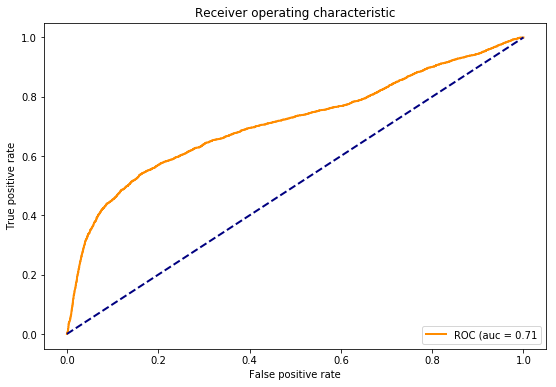

In [33]:
plot_roc_curve(y_true=y_true, y_score=y_score) #LogisticRegression

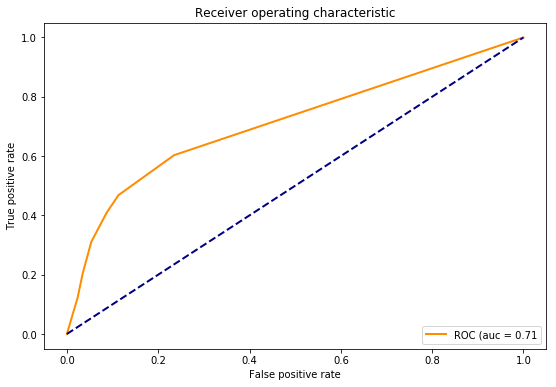

In [34]:
plot_roc_curve(y_true=y_true2, y_score=y_score2)  #decision tree

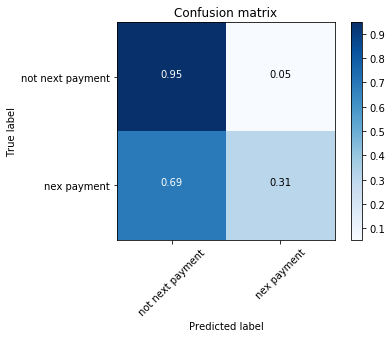

In [35]:
plot_confusion_matrix(cm=confusion_matrix(y_true=y_true2, y_pred=y_pred2),
                      class_names=["not next payment", "nex payment"]) # decision tree

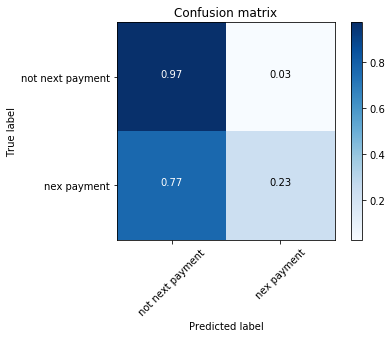

In [36]:
plot_confusion_matrix(cm=confusion_matrix(y_true=y_true, y_pred=y_pred),    #LogisticRegression
                      class_names=["not next payment", "nex payment"])